In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# чтение данных их csv-файла
df = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/telecom_churn.csv')

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Основные типы визуализаций

Универсальной функцией в pandas для построения графиков является функция **plot()**. Изменяя ее параметр **kind** можно менять тип графика

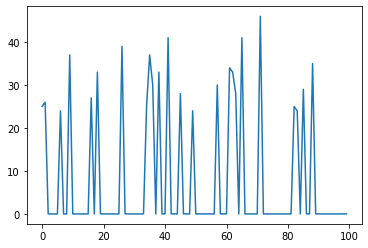

In [ ]:
# Простой график по одному полю
df['Number vmail messages'][:100].plot();

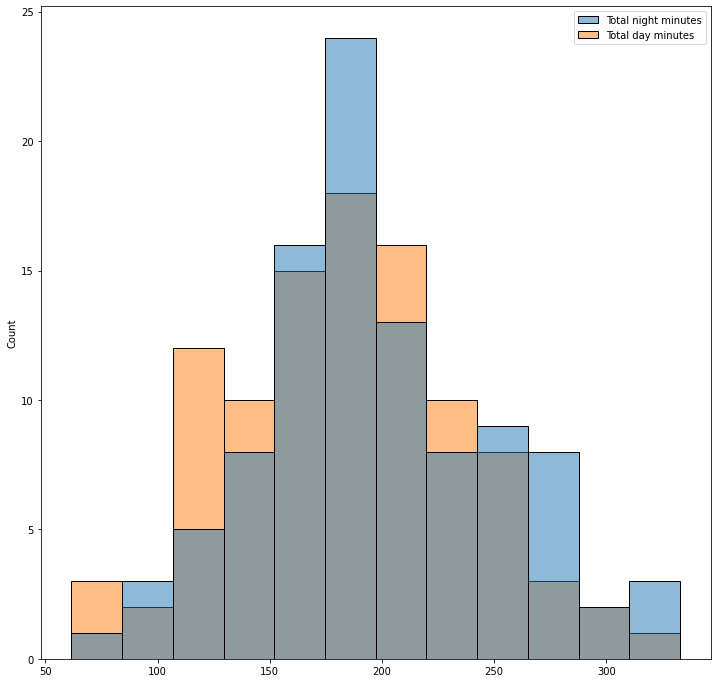

In [19]:
# Простой график по нескольким полям
plt.figure(figsize=(12,12))
sns.histplot(df[['Total night minutes','Total day minutes']][:100])

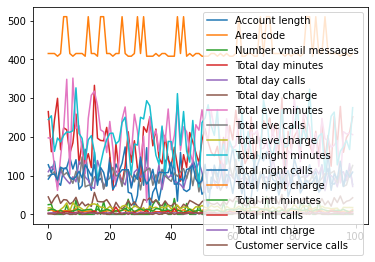

In [ ]:
# По всем полям
df[:100].plot()

Основные типы графиков представлен ниже. Практически для каждого типа графика есть отдельная функция, которая позволяет его построить

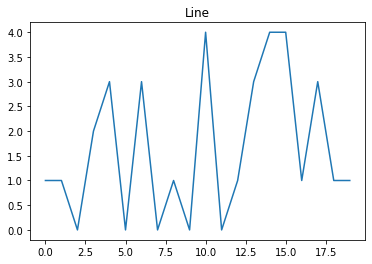

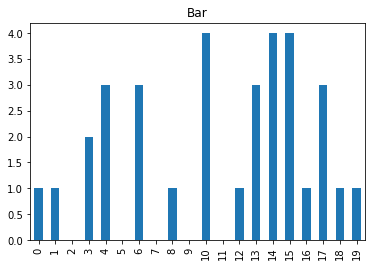

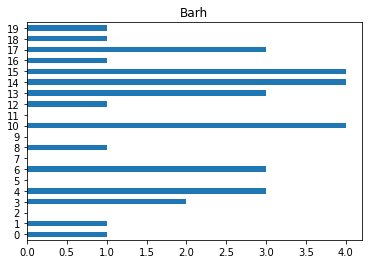

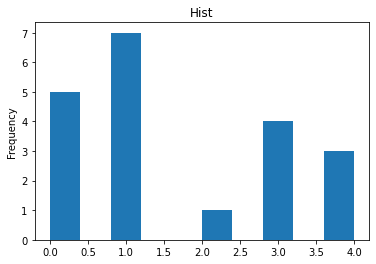

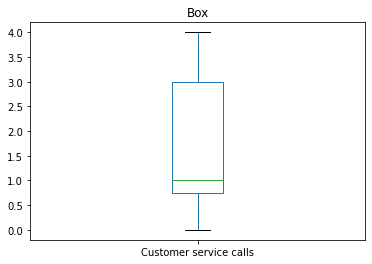

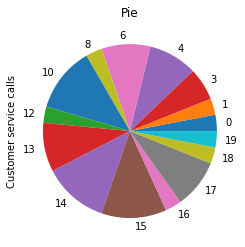

In [6]:
# Основные типы графиков в функции plot()
plot_types = ['line','bar','barh','hist','box','pie']
for plot_type in plot_types:
    df['Customer service calls'][:20].plot(kind=plot_type, title=plot_type.capitalize())
    plt.show()

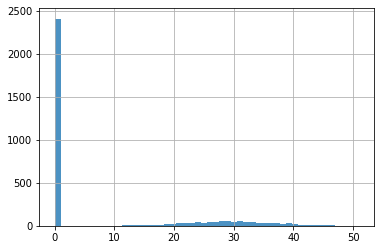

In [8]:
# Примеры специальных функций. Гистограмма
df['Number vmail messages'].hist(bins=50, alpha=0.8)

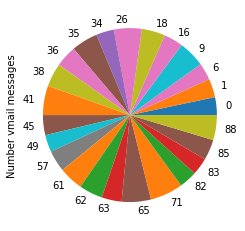

In [9]:
# Круговая диаграмма
df['Number vmail messages'][:100].plot.pie()

Диаграмма рассеяния позволяет анализировать **пары** параметров и выявлять их взаимосвязь 

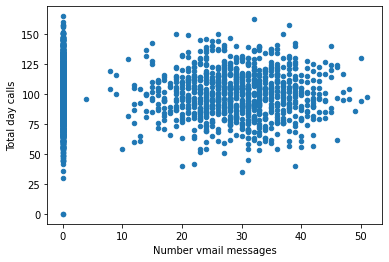

In [ ]:
df.plot.scatter(x='Number vmail messages', y='Total day calls')

In [21]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


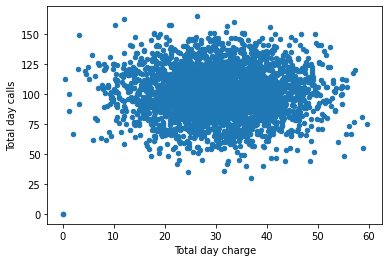

In [20]:
df.plot.scatter(x='Total day charge', y='Total day calls')

<Figure size 1080x720 with 0 Axes>

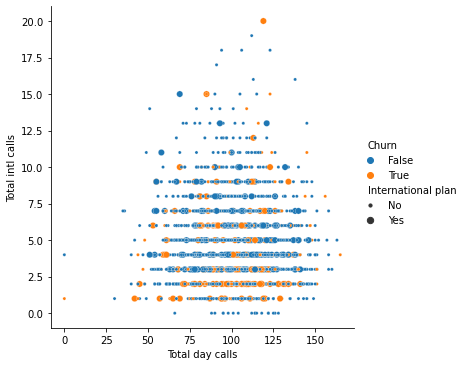

In [ ]:
# Диаграмма рассеяния в seaborn
plt.figure(figsize=(15,10))
sns.relplot(x="Total day calls", y="Total intl calls", hue="Churn", size="International plan", sizes=(40, 10), data=df);

### Визуальный анализ датасета

In [ ]:
df.head() 

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Посмотрим, как распределены абоненты по штатам. По круговой диаграмме видим, что распределение абонентов по штатам примерно равномерное, без сильного перекосав пользу какого-то, различия между секоторами не сильно видны. Попробуем то же самое посмотреть на столбчатой диаграмме

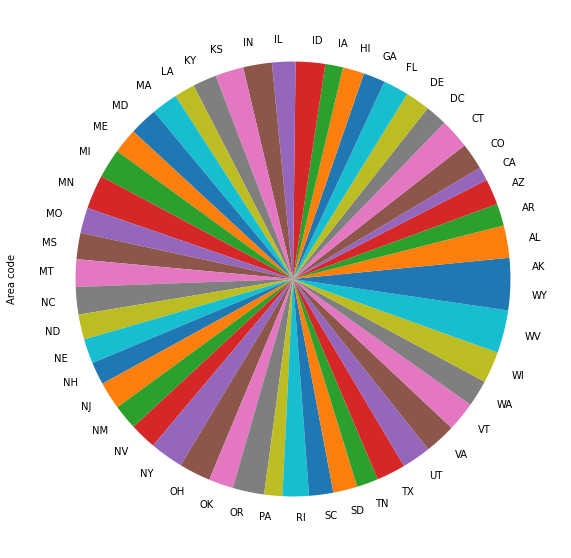

In [ ]:
gr = df.groupby('State')['Area code'].count().rename({'Area code':'Count'})

gr.plot.pie(figsize=(10,10))

В столбчатой гистограмме лучше видны небольшие различия, чем в круговой. Так, больше всего абонентов из штата WV, а меньше всего из CA

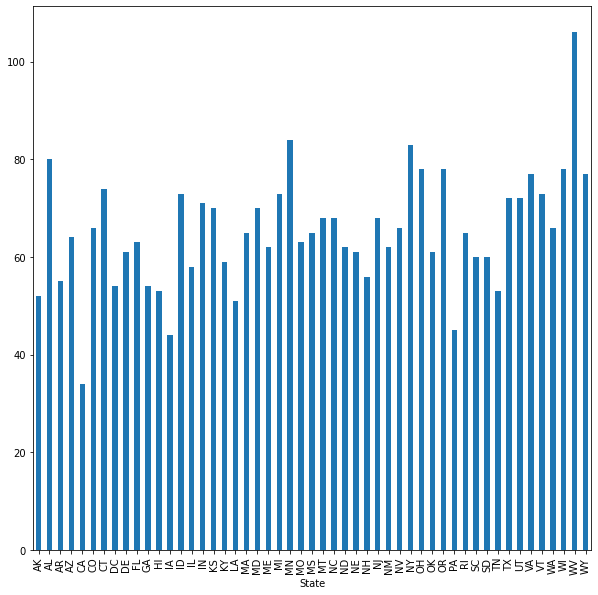

In [ ]:
gr.plot.bar(figsize=(10,10))

Далее, посмотрим на звонковые признаки, их распределение. По всем звонковым параметрам наблюдается похожее нормальное распределение, кроме **Total in calls** и **Customer service calls**. У параметра **Number vmail messages** есть пик значений, куда входит основное количество случаем и небольшое количество случаев, которые распределены нормально.

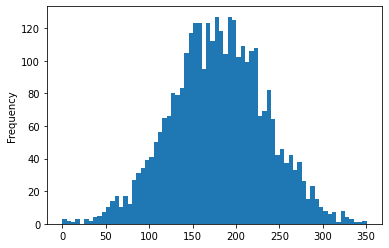

In [23]:
df['Total day minutes'].plot(bins=70, kind='hist')

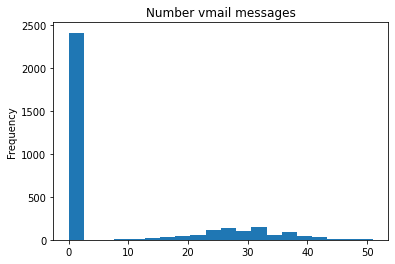

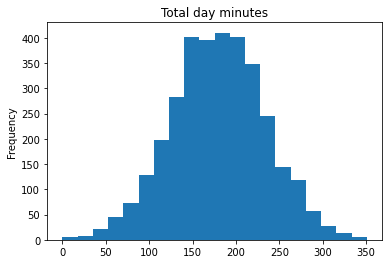

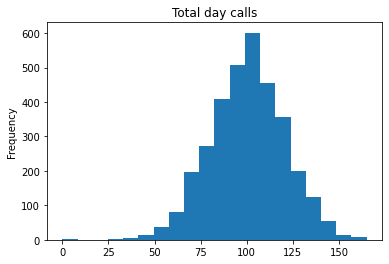

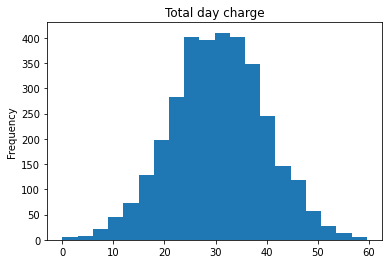

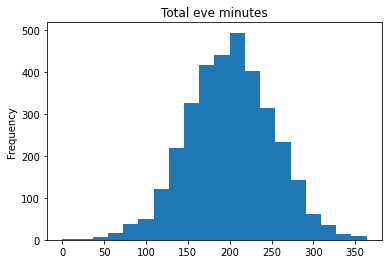

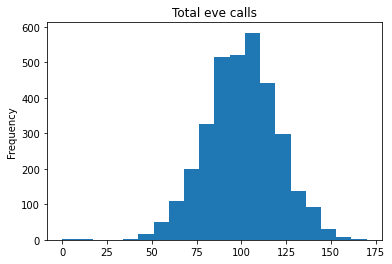

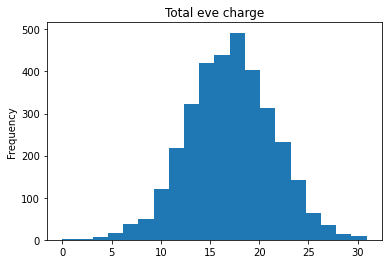

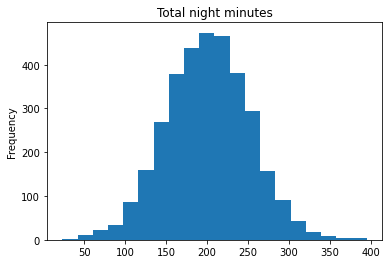

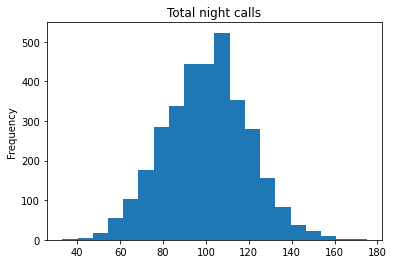

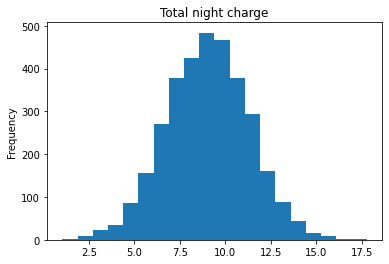

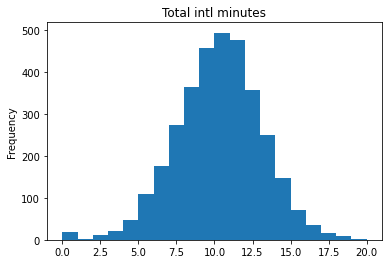

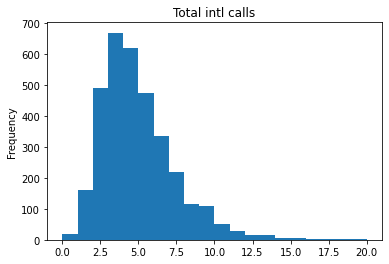

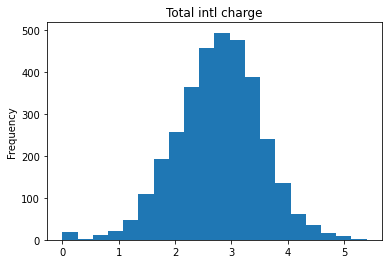

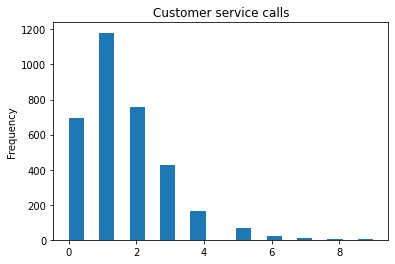

In [24]:
# построим сразу по всем звонковым признакам через цикл
# чтобы строились отдельные графики по каждому параметру надо вызвать plt.show()
# без этого, все гистограммы построятся на одном графике
for col in df.columns[5:-1]:
    df[col].plot(bins=20, kind='hist', title=col.capitalize())
    plt.show()

Построим несколько распределений на одном графике, видим, как они смещены относительно друг друга. Видим, что распределения по параметрам отличаются

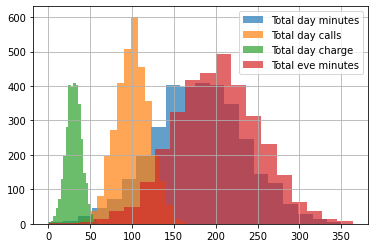

In [ ]:
for col in df.columns[6:10]:
    df[col].hist(bins=20, alpha=0.7, legend=True)

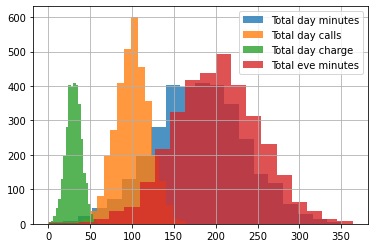

In [ ]:
# посмотрить несколько гистограмм на одной можно и так
df['Total day minutes'].hist(bins=20, alpha=0.8, legend=True)
df['Total day calls'].hist(bins=20, alpha=0.8, legend=True)
df['Total day charge'].hist(bins=20, alpha=0.8, legend=True)
df['Total eve minutes'].hist(bins=20, alpha=0.8, legend=True)

Посмотрим на распределение количества звонков разных типов

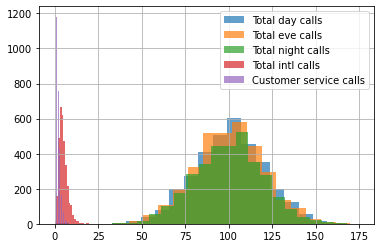

In [ ]:
df['Total day calls'].hist(bins=20, alpha=0.7, legend=True)
df['Total eve calls'].hist(bins=20, alpha=0.7, legend=True)
df['Total night calls'].hist(bins=20, alpha=0.7, legend=True)
df['Total intl calls'].hist(bins=20, alpha=0.7, legend=True)
df['Customer service calls'].hist(bins=20, alpha=0.7, legend=True)

Посмотрим на распределение расходов по разным типом звонков

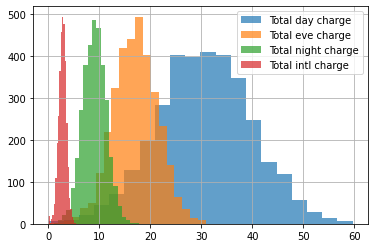

In [ ]:
df['Total day charge'].hist(bins=20, alpha=0.7, legend=True)
df['Total eve charge'].hist(bins=20, alpha=0.7, legend=True)
df['Total night charge'].hist(bins=20, alpha=0.7, legend=True)
df['Total intl charge'].hist(bins=20, alpha=0.7, legend=True)

Посмотрим на распределение длительности разных звонков

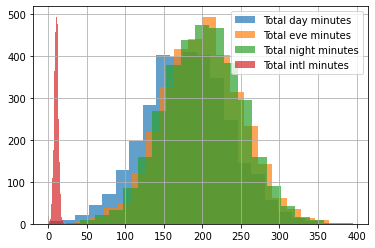

In [ ]:
df['Total day minutes'].hist(bins=20, alpha=0.7, legend=True)
df['Total eve minutes'].hist(bins=20, alpha=0.7, legend=True)
df['Total night minutes'].hist(bins=20, alpha=0.7, legend=True)
df['Total intl minutes'].hist(bins=20, alpha=0.7, legend=True)

Из сравнения длительности и стоимости звонков видно, расходы на звонки ночью самые низкие, а днем самые высокие, хотя из распределения длительности звонков видно, что длительность примерно одинаковая, даже немнного больше ночью и вечером. Выведим основные статистики по этим признакам. Они так же подтверждают это

In [ ]:
df[['Total day charge', 'Total eve charge',  'Total night charge',\
    'Total day minutes','Total eve minutes','Total night minutes']].describe()

,Total day charge,Total eve charge,Total night charge,Total day minutes,Total eve minutes,Total night minutes
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,30.562307,17.083540,9.039325,179.775098,200.980348,200.872037
std,9.259435,4.310668,2.275873,54.467389,50.713844,50.573847
min,0.000000,0.000000,1.040000,0.000000,0.000000,23.200000
25%,24.430000,14.160000,7.520000,143.700000,166.600000,167.000000
50%,30.500000,17.120000,9.050000,179.400000,201.400000,201.200000
75%,36.790000,20.000000,10.590000,216.400000,235.300000,235.300000
max,59.640000,30.910000,17.770000,350.800000,363.700000,395.000000


In [ ]:
# Найдем стоимость минуты разговора в разное время суток
tmp = pd.DataFrame()
tmp['day_min_cost'] = df['Total day charge']/df['Total day minutes']
tmp['eve_min_cost'] = df['Total eve charge']/df['Total eve minutes']
tmp['night_min_cost'] = df['Total night charge']/df['Total night minutes']

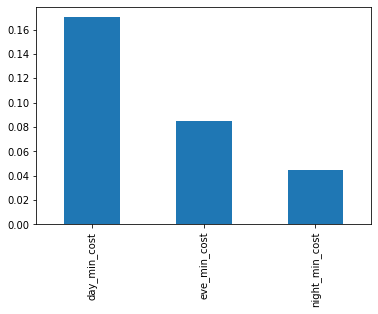

In [ ]:
tmp.mean().plot.bar()

Построим ящики с усами. Эти диаграммы также дают возможность посмотреть на распределения значений


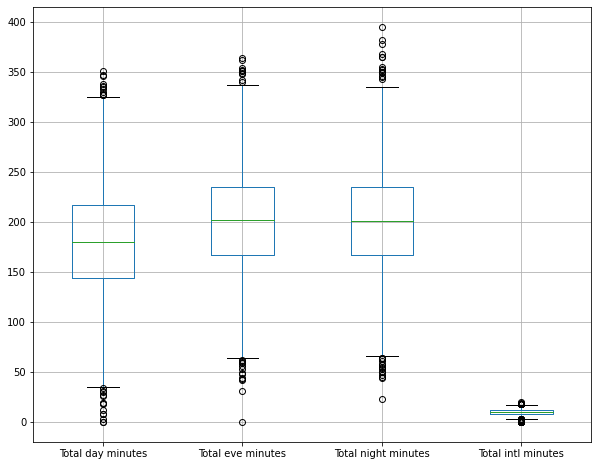

In [ ]:
df[['Total day minutes', 'Total eve minutes', 'Total night minutes','Total intl minutes']].boxplot(figsize=(10,8))

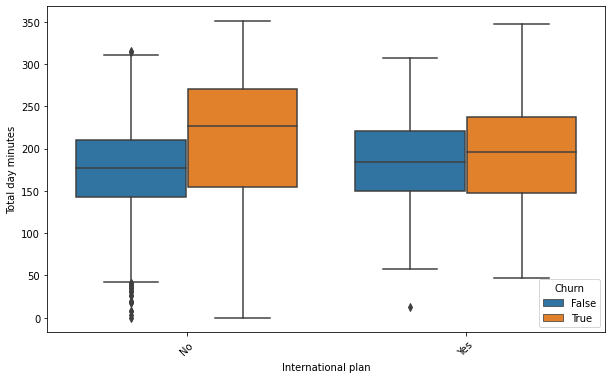

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='International plan', y='Total day minutes',hue='Churn', data=df)
plt.xticks(rotation=45);

Посмотрим на диаграммы рассеяния пар признаков. Чтобы не строить пары по всем признакам отбельно, будем использвать функцию **partplot()** библиотеки seaborn.

In [ ]:
columns_to_plot =['Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', \
                  'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes',\
                  'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']
sns.pairplot(df[columns_to_plot]);

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Чтобы раскрасить данные по признаку оттока, используем параметр hue
columns_to_plot =['Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', \
                  'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes',\
                  'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']
sns.pairplot(df[columns_to_plot], hue='Churn');

Output hidden; open in https://colab.research.google.com to view.

Можем просто визуализировать по оттоку простой гистограммой 

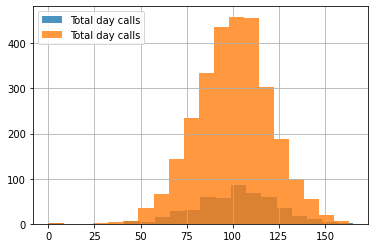

In [ ]:
calls_1 = df[df['Churn']==True]['Total day calls'].rename({'Total day calls': 'Left'})
calls_0 = df[df['Churn']==False]['Total day calls'].rename({'Total day calls': 'Stay'})

calls_1.hist(bins=20, alpha=0.8, legend=True)
calls_0.hist(bins=20, alpha=0.8, legend=True)

Еще одна удобная функция из seaborn **jointplot()**

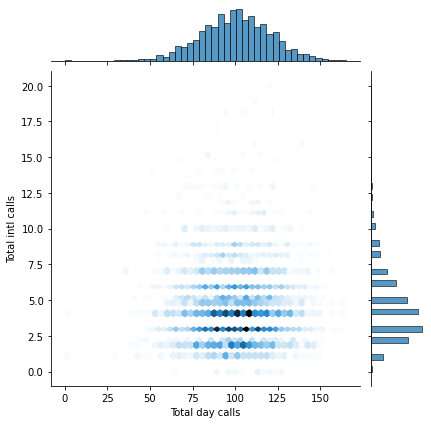

In [ ]:
sns.jointplot(x="Total day calls", y="Total intl calls", data=df, kind="hex") #scatter

### Корреляционный анализ

In [ ]:
# корреляионная матрица
df_for_corr = df.drop(columns=['Account length', 'Area code'])
df_for_corr.corr()

,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Number vmail messages,1.000000,0.000393,-0.009532,0.000390,0.017959,-0.006416,0.017912,0.007907,0.006971,0.007889,0.002801,0.013820,0.002828,-0.013419,-0.089888
Total day minutes,0.000393,1.000000,0.006750,1.000000,0.007043,0.015769,0.006968,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,-0.009532,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021350,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.000390,1.000000,0.006753,1.000000,0.007050,0.015769,0.006975,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,0.017959,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,-0.006416,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011341,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,0.017912,0.006968,-0.021350,0.006975,1.000000,-0.011341,1.000000,-0.012462,0.007752,-0.012471,-0.011065,0.002703,-0.011097,-0.013131,0.092747
Total night minutes,0.007907,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012462,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493
Total night calls,0.006971,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007752,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802,0.006141
Total night charge,0.007889,0.004300,0.022927,0.004301,-0.012593,-0.002056,-0.012471,0.999999,0.011188,1.000000,-0.015214,-0.012329,-0.015186,-0.009277,0.035496


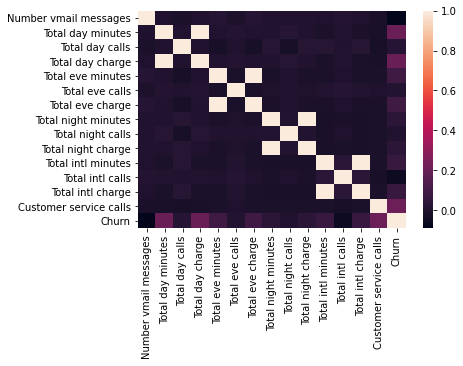

In [ ]:
# удобно анализировать корреляции на тепловой карте
sns.heatmap(df_for_corr.corr());

Настроим отображение тепловой карты 

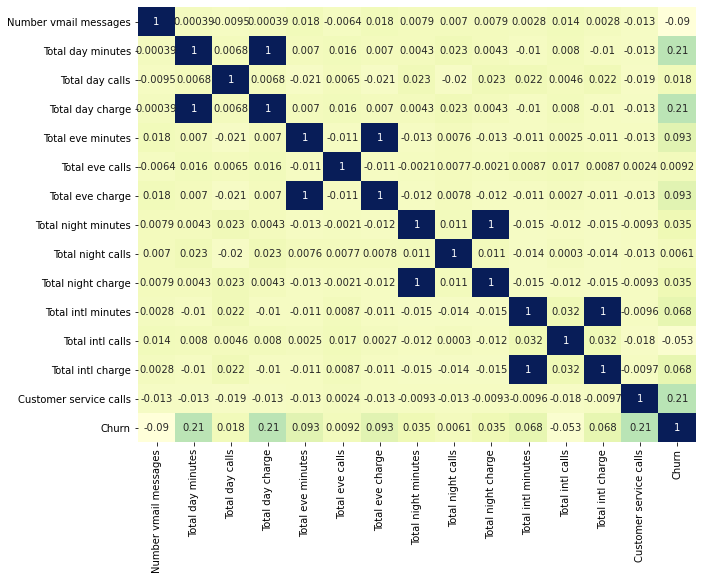

In [ ]:
# У тепловой карты есть разные параметры отображения
plt.figure(figsize=(10,8))
sns.heatmap(df_for_corr.corr(), annot=True, cmap="YlGnBu", cbar=False);

**Вопрос:** Почему коэффициент корреляции между длительностью и стоимостью звонка равен 1 ?

In [ ]:
tmp = df['Total day charge'] / df['Total day minutes']
tmp[:15]

0     0.170011
1     0.169988
2     0.170008
3     0.170007
4     0.170006
5     0.170009
6     0.169982
7     0.170000
8     0.170027
9     0.169992
10    0.170023
11    0.170005
12    0.170031
13    0.169987
14    0.170008
dtype: float64

In [ ]:
tmp.describe()

count    3331.000000
mean        0.170003
std         0.000028
min         0.169231
25%         0.169989
50%         0.170004
75%         0.170017
max         0.170513
dtype: float64

**Примеры настройки визуализации в pandas**

Для настройки отображения графиков есть множество различных параметров. Ниже примеры примеры графиков с разными настройками. Подробнее про наастройку параметров графиков можно почиать в документации pandas и mattplotlib

<AxesSubplot:title={'center':'Title_name'}>

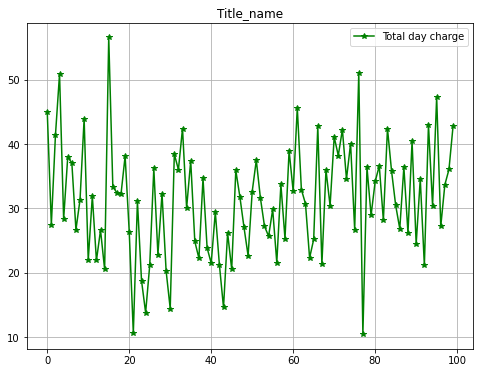

In [ ]:
# Настройки внешнего вида
df['Total day charge'][:100].plot(marker='*', color='green', figsize=(8,6), grid=True, legend=True, title='Title_name')

<AxesSubplot:>

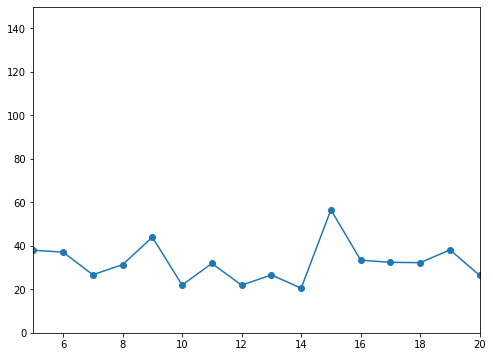

In [ ]:
# Ограничение по осям
df['Total day charge'][:100].plot(marker='o', figsize=(8,6), xlim=[5,20], ylim=[0,150])

<AxesSubplot:>

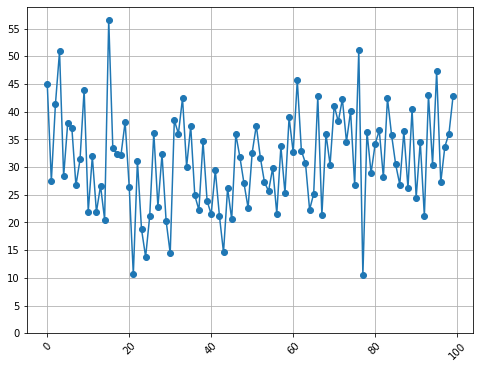

In [ ]:
# разбивка сетки
yticks = [i for i in range(0,60,5)]
df['Total day charge'][:100].plot(marker='o', figsize=(8,6), grid=True, yticks=yticks, rot=45)

In [ ]:
# пример настройки в гистограммах
# сгененируем датафрей для этого примера
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2

,a,b,c,d
0,0.593699,0.454561,0.482092,0.643585
1,0.396744,0.910191,0.404367,0.270376
2,0.957516,0.845828,0.452416,0.956866
3,0.830276,0.618792,0.034035,0.010512
4,0.360024,0.304793,0.162978,0.098603
5,0.523597,0.567502,0.425471,0.567010
6,0.851161,0.666148,0.886949,0.222012
7,0.300340,0.815024,0.321672,0.250361
8,0.989839,0.650864,0.375480,0.129012
9,0.076465,0.715862,0.805911,0.410178


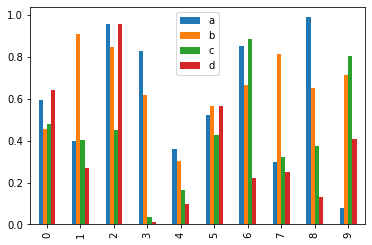

In [ ]:
# простая гистограмма
df2.plot.bar();

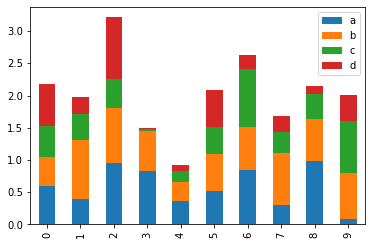

In [ ]:
# гистограмма с накоплением
df2.plot.bar(stacked=True);